# TechAcademy: Honey and Bees Python Solution

 # Exlporatory Data Analysis (EDA)

## Import Packages

In [174]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import dates as mdates
import plotly.express as px
import seaborn as sns

## Plot Styles

In [175]:
plt.style.use('./styles/ta.mplstyle')  # TA-Style
myFmt = mdates.DateFormatter('%Y-%m')

## Load the data

In [176]:
# Bees
bees = pd.read_csv('https://drive.google.com/uc?export=download&id=1lop3qnrSve5A13jNcL6wCehGpDaCrGRO', index_col=0)
# Honey
honey = pd.read_csv('https://drive.google.com/uc?export=download&id=1bQtWQluwwGUIgZuDOsJOE-4Om7x4HOxP', index_col=0)
# Weather
weather = pd.read_csv('https://drive.google.com/uc?export=download&id=130q2nv8-4S769iEEAsunGmiF16tahNmT', index_col=0)

## Rename the weather index nicely

In [177]:
# enjoy this link to rename the weather index https://gist.github.com/rogerallen/1583593
us_state_to_abbrev = {
    "Alabama": "AL",
    "Alaska": "AK",
    "Arizona": "AZ",
    "Arkansas": "AR",
    "California": "CA",
    "Colorado": "CO",
    "Connecticut": "CT",
    "Delaware": "DE",
    "Florida": "FL",
    "Georgia": "GA",
    "Hawaii": "HI",
    "Idaho": "ID",
    "Illinois": "IL",
    "Indiana": "IN",
    "Iowa": "IA",
    "Kansas": "KS",
    "Kentucky": "KY",
    "Louisiana": "LA",
    "Maine": "ME",
    "Maryland": "MD",
    "Massachusetts": "MA",
    "Michigan": "MI",
    "Minnesota": "MN",
    "Mississippi": "MS",
    "Missouri": "MO",
    "Montana": "MT",
    "Nebraska": "NE",
    "Nevada": "NV",
    "New Hampshire": "NH",
    "New Jersey": "NJ",
    "New Mexico": "NM",
    "New York": "NY",
    "North Carolina": "NC",
    "North Dakota": "ND",
    "Ohio": "OH",
    "Oklahoma": "OK",
    "Oregon": "OR",
    "Pennsylvania": "PA",
    "Rhode Island": "RI",
    "South Carolina": "SC",
    "South Dakota": "SD",
    "Tennessee": "TN",
    "Texas": "TX",
    "Utah": "UT",
    "Vermont": "VT",
    "Virginia": "VA",
    "Washington": "WA",
    "West Virginia": "WV",
    "Wisconsin": "WI",
    "Wyoming": "WY",
    "District of Columbia": "DC",
    "American Samoa": "AS",
    "Guam": "GU",
    "Northern Mariana Islands": "MP",
    "Puerto Rico": "PR",
    "United States Minor Outlying Islands": "UM",
    "U.S. Virgin Islands": "VI",
}

# invert the dictionary
abbrev_to_us_state = dict(map(reversed, us_state_to_abbrev.items()))
weather.rename(index=abbrev_to_us_state, inplace=True)

## Get a feeling for the data

In [178]:
print(bees.head())
print(honey.head())
print(weather.head())
print(bees["Starting Colonies"].describe())

print(bees.dtypes)
print(honey.dtypes)
print(weather.dtypes)

            Date Starting Colonies Maximum Colonies Lost Colonies  \
State                                                               
Alabama  2015-Q3              8500             9000          1400   
Alabama  2015-Q4              8000             8000           610   
Alabama  2016-Q1              7500             7500          1700   
Alabama  2015-Q2              7500             7500           860   
Alabama  2015-Q1              7000             7000          1800   

        Added Colonies Renovated Colonies Percent Renovated  \
State                                                         
Alabama            160                260                 3   
Alabama             80                 60                 1   
Alabama           2100                 90                 1   
Alabama           1900                680                 9   
Alabama           2800                250                 4   

        Varroa Mites (Percent) Other pests and parasites (Percent)  \
Stat

## Task 0: Some overall Statements

In [179]:
# Exclude index values regarding the U.S. as a whole
# State and year with most producing colonies ever
tmp = honey.copy()
tmp = tmp.drop(['United States'])
tmp1 = tmp.loc[tmp["Honey producing colonies (thousand)"] == tmp["Honey producing colonies (thousand)"].max()]
print(tmp1[["Honey producing colonies (thousand)", "Year"]])

              Honey producing colonies (thousand)  Year
State                                                  
North Dakota                                  530  2018


In [180]:
# State with lowest honey price every
tmp2 = tmp.loc[tmp["Average price per pound (dollars)"] == tmp["Average price per pound (dollars)"].min()]
print(tmp2[["Average price per pound (dollars)", "Year"]])

        Average price per pound (dollars)  Year
State                                          
Hawaii                               1.28  2019


In [181]:
# Total United States Honey production
# Year is a float
tmp3 = honey.loc[(honey["Production (1,000 pounds)"] == honey["Production (1,000 pounds)"].max()) & (honey.Year == 2016)]
print(tmp3[["Production (1,000 pounds)"]])

               Production (1,000 pounds)
State                                   
United States                     161882


In [182]:
# Total United States Honey producing colonies
tmp4 = tmp.loc[tmp.Year == 2016]
print(tmp4[["Honey producing colonies (thousand)"]].sum())

Honey producing colonies (thousand)    2775
dtype: int64


## Task 1: Convert from pounds to kg and prices to $/kg

In [183]:
honey["honey_producing_colonies"] = honey["Honey producing colonies (thousand)"] # * 1000
honey["yield_colony_kg"] = honey["Yield per colony (pounds)"] * 0.453592
honey["production_kg"] = honey["Production (1,000 pounds)"] * 0.453592  # * 1000
honey["stock_price_kg"] = honey["Stocks December 15  (1,000 pounds) "] /1000 * 0.453592 * 100
honey["avg_price_kk"] = honey["Average price per pound (dollars)"] * 0.453592
honey["prod_value"] = honey["Value of production (1,000 dollars)"]  # * 1000

honey.drop(
    ["Honey producing colonies (thousand)", "Yield per colony (pounds)", "Production (1,000 pounds)",
     "Stocks December 15  (1,000 pounds) ", "Average price per pound (dollars)", "Value of production (1,000 dollars)"],
    axis=1,
    inplace=True,
)

## Task 2: write loop to round up to the decimal place you prefer (does not make sense for Python really)

In [184]:
honey = honey.round(2)

## Task 3: Years in date format

In [185]:
honey.Year = pd.to_datetime(honey.Year, format="%Y")  # assumes start of year 01.01 by convention
bees.Date = pd.to_datetime(bees.Date)
weather.datetime = pd.to_datetime(weather.datetime)

## Task 4: numbers into numeric format, numeric should be a loop

In [187]:
cols = bees.columns.drop(['Date', 'Latitude', 'Longitude', 'State_code'])
bees[cols] = bees[cols].apply(pd.to_numeric, errors='coerce')

# as a tideous loop
# for col in cols:
#    bees[col] = pd.to_numeric(bees[col], errors='coerce')


In [188]:
bees.dtypes

Date                                   datetime64[ns]
Starting Colonies                             float64
Maximum Colonies                              float64
Lost Colonies                                 float64
Added Colonies                                float64
Renovated Colonies                            float64
Percent Renovated                             float64
Varroa Mites (Percent)                        float64
Other pests and parasites (Percent)           float64
Diseases (percent)                            float64
Pesticides (percent)                          float64
Other (percent)                               float64
Unknown (percent)                             float64
State_code                                     object
Latitude                                      float64
Longitude                                     float64
dtype: object

## Task 5: Calculate the percentage of lost colonies & round, why id you decide to round the way you have to?

In [189]:
bees["lost_colonies_percent"] = bees["Lost Colonies"] / bees["Starting Colonies"] * 100
bees.lost_colonies_percent

State
Alabama    16.470588
Alabama     7.625000
Alabama    22.666667
Alabama    11.466667
Alabama    25.714286
             ...    
Wyoming     3.500000
Wyoming    11.428571
Wyoming    10.909091
Wyoming     6.956522
Wyoming    13.076923
Name: lost_colonies_percent, Length: 1125, dtype: float64

## Task 6: Bees Missing Values

In [190]:
# Let's check out all missing values
null_data = bees[bees.isnull().any(axis=1)]
print(null_data)
# 2019-04-01 seems to have cross-state issues on bee data

# Deciding to do a simple combination of ffill and bfill
no_null_data = null_data.ffill().bfill()
print(no_null_data)

              Date  Starting Colonies  Maximum Colonies  Lost Colonies  \
State                                                                    
Alabama 2015-07-01             8500.0            9000.0         1400.0   
Alabama 2015-04-01             7500.0            7500.0          860.0   
Alabama 2015-01-01             7000.0            7000.0         1800.0   
Alabama 2016-10-01             7000.0            7000.0          610.0   
Alabama 2016-07-01             8000.0            8000.0         1200.0   
...            ...                ...               ...            ...   
Wyoming 2020-01-01             4000.0           17000.0          140.0   
Wyoming 2020-04-01            17500.0           30000.0         2000.0   
Wyoming 2020-07-01            33000.0           34000.0         3600.0   
Wyoming 2020-10-01            23000.0           25000.0         1600.0   
Wyoming 2021-01-01            13000.0           14500.0         1700.0   

         Added Colonies  Renovated Co

In [193]:
# actually apply that
bees = bees.ffill().bfill()

## Task 7: Group means over quarters for each year

In [241]:
# Sorry for the chain commands :P
bees_grped = bees.groupby([bees.index, bees.Date.dt.year]).mean().reset_index(level=1).sort_values(["State","Date"])
# group_by with reset_index does not preserve dtypes
bees_grped.Date = pd.to_datetime(bees_grped.Date, format="%Y")
bees_grped

,Date,Starting Colonies,Maximum Colonies,Lost Colonies,Added Colonies,Renovated Colonies,Percent Renovated,Varroa Mites (Percent),Other pests and parasites (Percent),Diseases (percent),Pesticides (percent),Other (percent),Unknown (percent),Latitude,Longitude,lost_colonies_percent
State,,,,,,,,,,,,,,,,
Alabama,2015-01-01,7750.0,7875.0,1167.5,1235.0,312.5,4.25,23.225,31.225,2.250,1.825,4.325,8.275,32.601011,-86.680736,15.319135
Alabama,2016-01-01,7625.0,7625.0,1110.0,947.5,210.0,7.75,14.450,20.525,1.275,4.000,4.275,8.450,32.601011,-86.680736,14.501488
Alabama,2017-01-01,7000.0,7625.0,982.5,752.5,567.5,8.00,32.400,13.900,2.250,13.075,6.325,5.925,32.601011,-86.680736,13.920879
Alabama,2018-01-01,7375.0,7750.0,1000.0,1177.5,1202.5,15.75,38.125,36.850,1.300,11.350,7.300,5.225,32.601011,-86.680736,13.247070
Alabama,2019-01-01,6375.0,6750.0,737.5,725.0,327.5,4.50,32.425,25.325,1.650,4.950,7.800,7.200,32.601011,-86.680736,11.561688
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Wyoming,2017-01-01,21125.0,28000.0,3475.0,3225.0,1830.0,5.75,23.525,1.875,7.625,3.275,5.000,1.925,43.000325,-107.554567,23.066392
Wyoming,2018-01-01,19250.0,25750.0,2280.0,1897.5,1525.0,4.75,22.425,2.775,1.750,4.475,2.225,2.500,43.000325,-107.554567,12.969251
Wyoming,2019-01-01,16000.0,18500.0,1700.0,650.0,997.5,3.75,18.675,3.175,1.675,0.550,2.900,5.075,43.000325,-107.554567,8.103632


## Task 8: Prepare for merging bees with honey

In [242]:
bees_grped.rename(
    columns={
    "Starting Colonies": "starting_cols",
    "Maximum Colonies": "max_cols",
    "Lost Colonies": "lost_cols",
    "Added Colonies": "added_cols",
    "Diseases (percent)": "diseases_perc",
    "Other pests and parasites (Percent)": "other_pest_parasites_perc",
    "Other (percent)": "other_perc",
    "Unknown (percent)": "unknown_perc",
    "Percent Renovated": "perc_renovated",
    "Renovated Colonies": "renovated_cols",
    "Pesticides (percent)": "pesticides_perc",
    "Varroa Mites (Percent)": "varroa_mites_perc",
},
    inplace=True,
)

## Task 9: Merge

In [243]:
bees_grped

,Date,starting_cols,max_cols,lost_cols,added_cols,renovated_cols,perc_renovated,varroa_mites_perc,other_pest_parasites_perc,diseases_perc,pesticides_perc,other_perc,unknown_perc,Latitude,Longitude,lost_colonies_percent
State,,,,,,,,,,,,,,,,
Alabama,2015-01-01,7750.0,7875.0,1167.5,1235.0,312.5,4.25,23.225,31.225,2.250,1.825,4.325,8.275,32.601011,-86.680736,15.319135
Alabama,2016-01-01,7625.0,7625.0,1110.0,947.5,210.0,7.75,14.450,20.525,1.275,4.000,4.275,8.450,32.601011,-86.680736,14.501488
Alabama,2017-01-01,7000.0,7625.0,982.5,752.5,567.5,8.00,32.400,13.900,2.250,13.075,6.325,5.925,32.601011,-86.680736,13.920879
Alabama,2018-01-01,7375.0,7750.0,1000.0,1177.5,1202.5,15.75,38.125,36.850,1.300,11.350,7.300,5.225,32.601011,-86.680736,13.247070
Alabama,2019-01-01,6375.0,6750.0,737.5,725.0,327.5,4.50,32.425,25.325,1.650,4.950,7.800,7.200,32.601011,-86.680736,11.561688
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Wyoming,2017-01-01,21125.0,28000.0,3475.0,3225.0,1830.0,5.75,23.525,1.875,7.625,3.275,5.000,1.925,43.000325,-107.554567,23.066392
Wyoming,2018-01-01,19250.0,25750.0,2280.0,1897.5,1525.0,4.75,22.425,2.775,1.750,4.475,2.225,2.500,43.000325,-107.554567,12.969251
Wyoming,2019-01-01,16000.0,18500.0,1700.0,650.0,997.5,3.75,18.675,3.175,1.675,0.550,2.900,5.075,43.000325,-107.554567,8.103632


In [245]:
honey

,Year,honey_producing_colonies,yield_colony_kg,production_kg,stock_price_kg,avg_price_kk,prod_value
State,,,,,,,
Alabama,2015-01-01,7,21.32,149.23,0.59,1.74,1260
Arizona,2015-01-01,26,22.23,577.88,13.88,0.98,2765
Arkansas,2015-01-01,24,32.66,783.81,5.49,0.92,3491
California,2015-01-01,275,13.61,3742.13,67.36,0.93,16830
Colorado,2015-01-01,29,23.13,670.86,18.10,0.99,3224
...,...,...,...,...,...,...,...
West Virginia,2020-01-01,6,20.87,125.19,2.63,1.76,1074
Wisconsin,2020-01-01,45,22.68,1020.58,38.78,1.48,7335
Wyoming,2020-01-01,38,18.14,689.46,27.58,0.75,2523


In [249]:
bees_and_honey = bees_grped.merge(honey, left_on=["State", "Date"], right_on=["State", "Year"]).sort_values(by=["State", "Date"])
bees_and_honey

# Observe that we have lost quite a few observations with this inner merge as the bees data set is more comprehensive than the honey set

,Date,starting_cols,max_cols,lost_cols,added_cols,renovated_cols,perc_renovated,varroa_mites_perc,other_pest_parasites_perc,diseases_perc,...,Latitude,Longitude,lost_colonies_percent,Year,honey_producing_colonies,yield_colony_kg,production_kg,stock_price_kg,avg_price_kk,prod_value
State,,,,,,,,,,,,,,,,,,,,,
Alabama,2015-01-01,7750.0,7875.0,1167.5,1235.0,312.5,4.25,23.225,31.225,2.250,...,32.601011,-86.680736,15.319135,2015-01-01,7,21.32,149.23,0.59,1.74,1260
Alabama,2016-01-01,7625.0,7625.0,1110.0,947.5,210.0,7.75,14.450,20.525,1.275,...,32.601011,-86.680736,14.501488,2016-01-01,7,23.59,165.11,1.50,1.53,1227
Alabama,2017-01-01,7000.0,7625.0,982.5,752.5,567.5,8.00,32.400,13.900,2.250,...,32.601011,-86.680736,13.920879,2017-01-01,7,20.41,142.88,1.00,1.26,873
Alabama,2018-01-01,7375.0,7750.0,1000.0,1177.5,1202.5,15.75,38.125,36.850,1.300,...,32.601011,-86.680736,13.247070,2018-01-01,6,20.41,122.47,0.64,1.62,964
Alabama,2019-01-01,6375.0,6750.0,737.5,725.0,327.5,4.50,32.425,25.325,1.650,...,32.601011,-86.680736,11.561688,2019-01-01,7,19.05,133.36,2.00,1.45,941
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Wyoming,2016-01-01,16550.0,25125.0,3035.0,2447.5,395.0,1.25,30.725,1.925,1.250,...,43.000325,-107.554567,20.816898,2016-01-01,40,30.84,1233.77,8.62,0.80,4787
Wyoming,2017-01-01,21125.0,28000.0,3475.0,3225.0,1830.0,5.75,23.525,1.875,7.625,...,43.000325,-107.554567,23.066392,2017-01-01,39,24.04,937.57,8.44,0.72,3287
Wyoming,2018-01-01,19250.0,25750.0,2280.0,1897.5,1525.0,4.75,22.425,2.775,1.750,...,43.000325,-107.554567,12.969251,2018-01-01,39,25.40,990.64,7.94,0.86,4128


## Other stuff

In [10]:
# average production by state
avg_state_prod = honey.groupby(honey.index)["production_kg"].mean()

# production by state and year
state_year_prod = honey.groupby([honey.index, honey.Year])["production_kg"].sum()


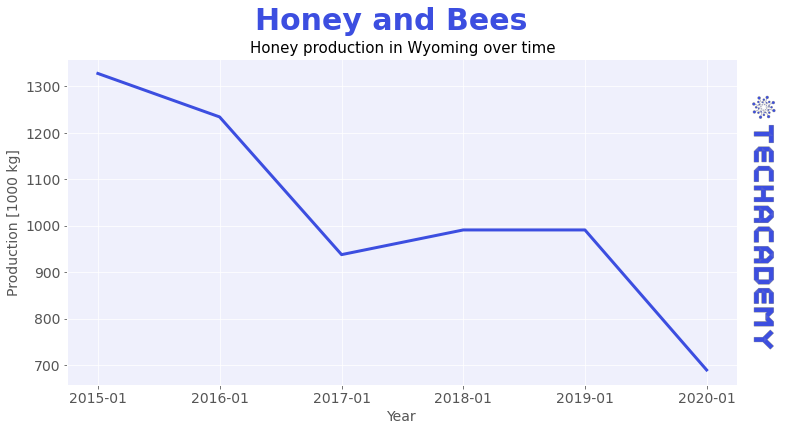

In [11]:
state = "Wyoming"
suptitle = "Honey and Bees"
title = f"Honey production in {state} over time"
fig, ax = plt.subplots(figsize=(12,6))
plt.suptitle(suptitle, size=30, y=1, c='#3C4EE0', fontweight="bold")
plt.title(title, fontsize=15)
plt.xlabel('Year')
plt.ylabel('Production [1000 kg]')

# plot data
df = state_year_prod[state:state]
ax.plot(df.index.get_level_values('Year'), df.values)

# TA Logo
im = plt.imread("../logos/TA_Logo_Vertical1.png")
newax = fig.add_axes([.75, .2, .2, 0.6], anchor='NE', zorder=1)
newax.imshow(im, alpha=1)
newax.axis('off')
# date formatting
ax.xaxis.set_major_formatter(myFmt)
plt.savefig(f"../Leitfaden/plot/{title}.jpg", bbox_inches="tight", dpi=800)

## Bienenpopulation (starting colonies) ; sorted by lowest to highest, + Strich representing mean

In [12]:
# Only most recent, January 2021, observations
jan21_bee_pop = pd.DataFrame(bees.loc[bees.Date >= '2021'])
# change string bojects to numerics
jan21_bee_pop["Starting Colonies"] = pd.to_numeric(jan21_bee_pop["Starting Colonies"])
# sort ascending (this wont work as intended if the value are string objects)
jan21_bee_pop = jan21_bee_pop.sort_values(by="Starting Colonies")

In [13]:
jan21_bee_pop["Starting Colonies"]

State
Maine                2900
Colorado             3000
New Mexico           3500
Connecticut          4200
Massachusetts        5000
Kansas               5000
Missouri             5500
West Virginia        7000
Virginia             7000
Maryland             7000
Vermont              7500
Illinois             9500
Kentucky             9500
Alabama             10000
Indiana             10000
Nebraska            11000
Tennessee           12000
Wyoming             13000
New Jersey          14000
Iowa                15000
South Carolina      15500
Utah                17500
Ohio                17500
North Carolina      18000
Hawaii              19500
Pennsylvania        20000
Arkansas            21000
Wisconsin           25000
Oklahoma            28000
South Dakota        28000
Arizona             29000
New York            30000
Mississippi         33000
Montana             40000
Minnesota           41000
Washington          48000
North Dakota        51000
Louisiana           51000
Oregon

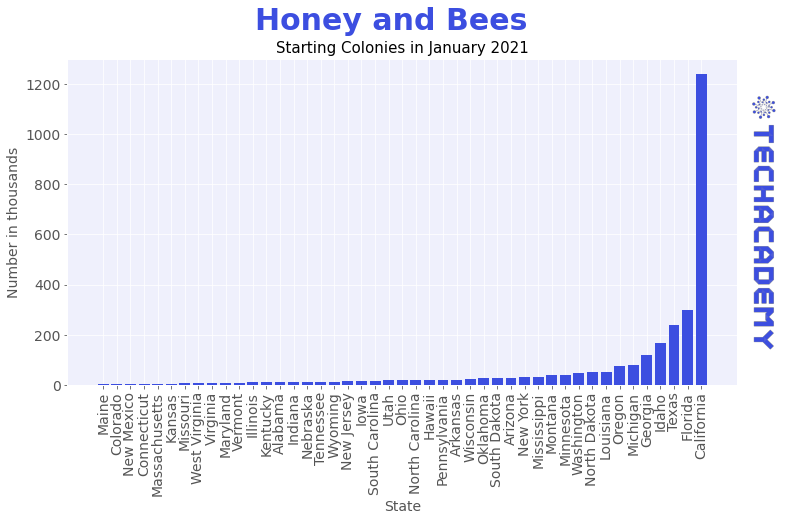

In [14]:
suptitle = "Honey and Bees"
title = f"Starting Colonies in January 2021"
fig, ax = plt.subplots(figsize=(12,6))
plt.suptitle(suptitle, size=30, y=1, c='#3C4EE0', fontweight="bold")
plt.title(title, fontsize=15)
plt.xticks(rotation=90)
plt.xlabel('State')
plt.ylabel('Number in thousands')

# plot data
ax.bar(jan21_bee_pop.index, jan21_bee_pop["Starting Colonies"]/1000)

# TA Logo
im = plt.imread("../logos/TA_Logo_Vertical1.png")
newax = fig.add_axes([.75, .2, .2, 0.6], anchor='NE', zorder=1)
newax.imshow(im, alpha=1)
newax.axis('off')

plt.savefig(f"../Leitfaden/plot/{title}.jpg", bbox_inches="tight", dpi=800)

In [49]:
df = bees.copy()[['Date', 'Starting Colonies']]
df = df.sort_values('Date') # Make sure you sort the time horizon column in ascending order because this column may be in random order
df['Date'] = df['Date'].dt.date.astype(str)
df = df.replace('(NA)', np.nan)
df['Starting Colonies'] = np.log(pd.to_numeric(df['Starting Colonies']))  # important to apply log because of the large discrepancies
df.rename(index=us_state_to_abbrev, inplace=True)
title = 'Bee starting colonies in the U.S. states over time'
fig = px.choropleth(df,
                    locations=df.index,
                    locationmode="USA-states",
                    color='Starting Colonies',
                    color_continuous_scale="agsunset",
                    scope="usa",
                    animation_frame='Date',  # make sure 'Date' is string type and sorted in ascending order
                    animation_group='Starting Colonies'
                    )
fig.update_layout(
      title_text = title,
      title_font_family="Times New Roman",
      title_font_size = 22,
      title_font_color="black",
      title_x=0.45,
     )
fig.write_image(f"../Leitfaden/plot/{title}.jpg")
fig.show()

In [105]:
honey.Year.dt.year.unique()

array([2015, 2016, 2017, 2018, 2019, 2020], dtype=int64)

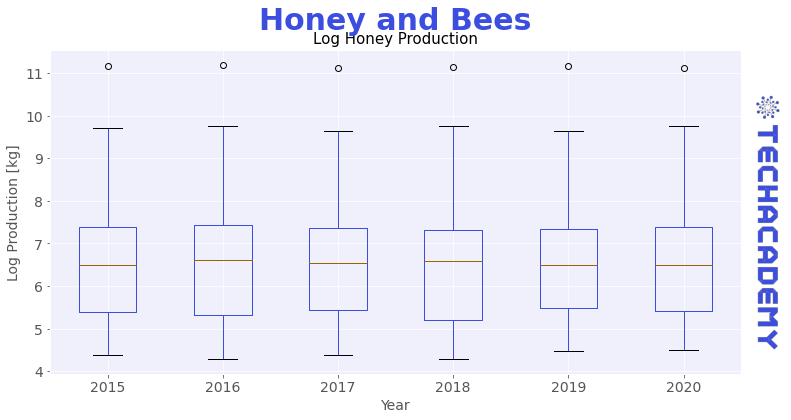

In [118]:
suptitle = "Honey and Bees"
title = "Log Honey Production"
fig, ax = plt.subplots(figsize=(12,6))

df = honey.copy()
df.production_kg = np.log(df.production_kg)  # normalize or choose quantiles
df.boxplot(column="production_kg", by="Year", ax=ax)

plt.suptitle(suptitle, size=30, y=1, c='#3C4EE0', fontweight="bold")
plt.title(title, fontsize=15)
plt.xlabel('Year')
plt.ylabel('Log Production [kg]')
ax.set_xticklabels(honey.Year.dt.year.unique())

# TA Logo
im = plt.imread("../logos/TA_Logo_Vertical1.png")
newax = fig.add_axes([.75, .2, .2, 0.6], anchor='NE', zorder=1)
newax.imshow(im, alpha=1)
newax.axis('off')

plt.savefig(f"../Leitfaden/plot/{title}.jpg", bbox_inches="tight", dpi=800)

plt.show()

# Advanced Section

## Merging Weather and Bees

In [92]:
bees["quarterly_dt"] = bees.Date.dt.to_period("Q")
weather["quarterly_dt"] = weather.datetime.dt.to_period("Q")
# quite a few weather columns are completely empty
weather_essentials = weather.dropna(axis=1, how='all')

In [93]:
# aggregate with simple means
weather_essentials = weather_essentials.groupby([weather_essentials.index, weather_essentials.quarterly_dt]).mean()

In [94]:
weather_essentials
#bees

latitude  longitude    tempmax    tempmin       temp  \
State_code quarterly_dt                                                         
Alabama    2015Q1          32.601    -86.681  15.486667   4.122222   9.508889   
           2015Q2          32.601    -86.681  28.231868  17.586813  22.627473   
           2015Q3          32.601    -86.681  31.607609  21.250000  25.821739   
           2015Q4          32.601    -86.681  21.700000  11.019565  15.893478   
           2016Q1          32.601    -86.681  17.181319   5.653846  10.989011   
...                           ...        ...        ...        ...        ...   
Wyoming    2019Q4          43.000   -107.555   2.231522  -7.939130  -3.003261   
           2020Q1          43.000   -107.555   0.962637  -9.890110  -4.492308   
           2020Q2          43.000   -107.555  17.840659   4.404396  11.105495   
           2020Q3          43.000   -107.555  26.821739  12.392391  19.530435   
           2020Q4          43.000   -107.555   6.415217  -5.270652   0.506522   

                         feelslikemax  feelslikemin  feelslike        dew  \
State_code quarterly_dt                                                     
Alabama    2015Q1           15.066667      2.534444   8.467778   3.942222   
           2015Q2           29.465934     17.586813  23.100000  17.712088   
           2015Q3           34.966304     21.250000  27.216304  21.133696   
           2015Q4           21.747826     10.829348  15.802174  11.970652   
           2016Q1           16.915385      4.712088  10.330769   5.110989   
...                               ...           ...        ...        ...   
Wyoming    2019Q4            1.002174    -13.060870  -6.253261  -8.920652   
           2020Q1           -0.571429    -15.474725  -8.332967  -9.574725   
           2020Q2           17.370330      1.449451   9.751648  -1.298901   
           2020Q3           25.604348     11.720652  19.028261   0.708696   
           2020Q4            4.892391     -9.808696  -2.486957  -9.266304   

                          humidity  ...  precipcover  snowdepth   windgust  \
State_code quarterly_dt             ...                                      
Alabama    2015Q1        72.147111  ...     8.333444        NaN  38.605128   
           2015Q2        76.751868  ...     7.097253        NaN  39.669697   
           2015Q3        77.849348  ...     6.340870        NaN  39.620000   
           2015Q4        80.227065  ...    11.574457        NaN  32.429545   
           2016Q1        70.745934  ...     7.787802        NaN  35.778333   
...                            ...  ...          ...        ...        ...   
Wyoming    2019Q4        68.109130  ...     3.487283        NaN  57.015152   
           2020Q1        70.770330  ...     3.113407        NaN  54.642857   
           2020Q2        47.948242  ...     2.930330        NaN  55.163095   
           2020Q3        32.694565  ...     0.815217        NaN  51.517808   
           2020Q4        53.486630  ...     1.856957        NaN  57.865000   

                         windspeed     winddir  sealevelpressure  cloudcover  \
State_code quarterly_dt                                                        
Alabama    2015Q1        16.915556  191.694444       1021.847778   23.354444   
           2015Q2        14.219780  164.123077       1017.416484   16.114286   
           2015Q3        13.739130  170.507609       1015.601087   16.291304   
           2015Q4        14.769565  149.811957       1019.061957   27.982609   
           2016Q1        17.481319  198.839560       1019.084615   24.869231   
...                            ...         ...               ...         ...   
Wyoming    2019Q4        23.529348  157.460870       1020.114130   25.010870   
           2020Q1        27.403297  174.134066       1018.860440   22.268132   
           2020Q2        34.343956  191.791209       1012.487912   22.918681   
           2020Q3        30.652174  184.229348       1013.752174    5.8130

In [96]:
bees_and_weather = bees.merge(weather_essentials, left_on=["State", "quarterly_dt"], right_on=["quarterly_dt"], right_index=True)
bees_and_weather

,Date,Starting Colonies,Maximum Colonies,Lost Colonies,Added Colonies,Renovated Colonies,Percent Renovated,Varroa Mites (Percent),Other pests and parasites (Percent),Diseases (percent),...,precipcover,snowdepth,windgust,windspeed,winddir,sealevelpressure,cloudcover,visibility,Group4,Group3
State,,,,,,,,,,,,,,,,,,,,,
Alabama,2015-07-01,8500.0,9000.0,1400.0,160.0,260.0,3.0,63.1,70.6,NaN,...,6.340870,NaN,39.620000,13.739130,170.507609,1015.601087,16.291304,15.429348,1.0,1.0
Alabama,2015-10-01,8000.0,8000.0,610.0,80.0,60.0,1.0,3.1,6.4,0.2,...,11.574457,NaN,32.429545,14.769565,149.811957,1019.061957,27.982609,14.834783,1.0,1.0
Alabama,2016-01-01,7500.0,7500.0,1700.0,2100.0,90.0,1.0,24.2,22.0,4.3,...,7.787802,NaN,35.778333,17.481319,198.839560,1019.084615,24.869231,15.171429,1.0,1.0
Alabama,2015-04-01,7500.0,7500.0,860.0,1900.0,680.0,9.0,16.7,42.5,NaN,...,7.097253,NaN,39.669697,14.219780,164.123077,1017.416484,16.114286,15.285714,1.0,1.0
Alabama,2015-01-01,7000.0,7000.0,1800.0,2800.0,250.0,4.0,10.0,5.4,NaN,...,8.333444,NaN,38.605128,16.915556,191.694444,1021.847778,23.354444,14.812222,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Wyoming,2019-10-01,27000.0,28000.0,3300.0,100.0,490.0,2.0,27.6,12.3,3.2,...,3.487283,NaN,57.015152,23.529348,157.460870,1020.114130,25.010870,14.902174,4.0,3.0
Wyoming,2020-01-01,4000.0,17000.0,140.0,450.0,60.0,NaN,NaN,NaN,0.1,...,3.113407,NaN,54.642857,27.403297,174.134066,1018.860440,22.268132,15.146154,4.0,3.0
Wyoming,2020-04-01,17500.0,30000.0,2000.0,4400.0,2100.0,7.0,28.8,NaN,0.1,...,2.930330,NaN,55.163095,34.343956,191.791209,1012.487912,22.918681,15.483516,4.0,3.0


## Adding interesting things

In [113]:
bees_and_weather["tmp_difference"] = bees_and_weather["tempmax"] - bees_and_weather["tempmin"]
bees_and_weather.groupby("State")["temp"].var()

State
Alabama            35.443173
Arizona            51.321686
Arkansas           54.029397
California         45.371672
Colorado           40.803187
Connecticut        70.498244
Florida            13.379443
Georgia            35.039398
Hawaii              1.869496
Idaho              78.553766
Illinois           77.351882
Indiana            74.999178
Iowa               93.521444
Kansas             76.958379
Kentucky           59.915138
Louisiana          28.609008
Maine              82.713393
Maryland           62.146117
Massachusetts      67.794578
Michigan           77.749545
Minnesota          97.568630
Mississippi        36.712211
Missouri           65.776313
Montana            59.967011
Nebraska           80.052505
New Jersey         64.514617
New Mexico               NaN
New York           66.153272
North Carolina     46.666104
North Dakota      115.886121
Ohio               69.553401
Oklahoma           64.278542
Oregon             44.268786
Pennsylvania       68.611893
South Ca

## Correlations

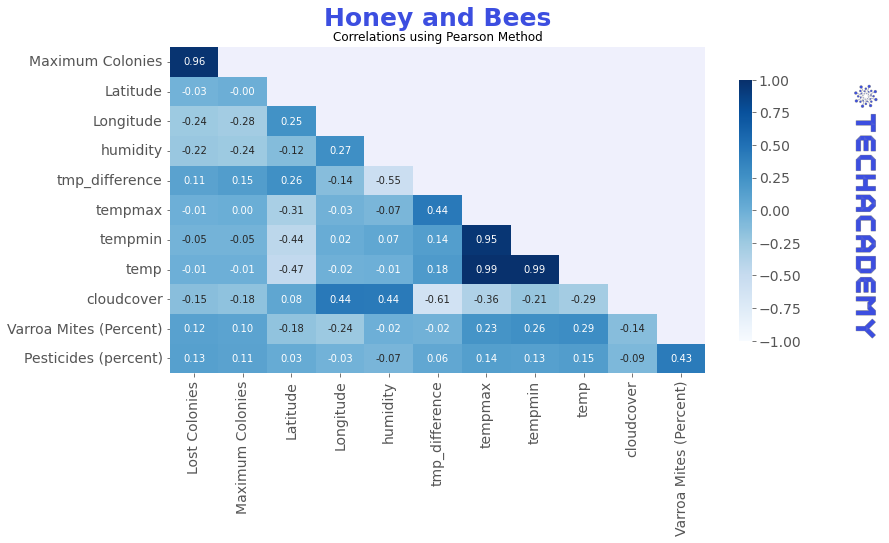

In [114]:
suptitle = "Honey and Bees"
title = "Correlations using Pearson Method"
fig, ax = plt.subplots(figsize=(12,6))

columns = ["Lost Colonies", "Maximum Colonies", "Latitude", "Longitude", "humidity", "tmp_difference", "tempmax", "tempmin", "temp", "cloudcover", "Varroa Mites (Percent)", "Pesticides (percent)"]
df = bees_and_weather[columns].corr()

mask = np.triu(np.ones_like(df, dtype=bool))
mask = mask[1:, :-1]

corr = df.iloc[1:,:-1].copy()

ax.text(y=1.05, x=0.5, s=suptitle, c='#3C4EE0', fontsize=25, weight='bold', ha='center', va='bottom', transform=ax.transAxes)
ax.text(y=1.01, x=0.5, s=title, fontsize=12, alpha=1, ha='center', va='bottom', transform=ax.transAxes)

sns.heatmap(corr, mask=mask, ax=ax, annot=True, fmt=".2f", cmap='Blues',
           vmin=-1, vmax=1, cbar_kws={"shrink": .8})

plt.yticks(rotation=0   )

# TA Logo
im = plt.imread("../logos/TA_Logo_Vertical1.png")
newax = fig.add_axes([.75, .2, .2, 0.6], anchor='NE', zorder=1)
newax.imshow(im, alpha=1)
newax.axis('off')

plt.savefig(f"../Leitfaden/plot/{title}.jpg", bbox_inches="tight", dpi=800)

plt.show()